[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/classification/logistic.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Logistic regression

This example notebook show how to build, train and evaluate different logistic regression classifiers.

We use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) stored in `data/cancer.csv`.

The dataset features we will use are:
- diagnosis: target variable (M = malignant, B = benign)
- radius_mean: average size of the nuclei.
- texture_mean: variability in the intensity of pixel values.
- smoothness_mean: regularity of the nuclei surfaces.
- compactness_mean: compactness of the nuclei, indicating shape irregularities.

In [37]:
# make sure the required packages are installed
%pip install pandas seaborn matplotlib scikit-learn --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/classification'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/data/* data/.
# import the required modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import utils

random_state = 42

Note: you may need to restart the kernel to use updated packages.


## Dataset

We define some metadata. Then, we load the dataset and replace the `diagnosis` column values with 0 (benign) and 1 (malignant).

In [38]:
dataset_file_name = 'data/cancer.csv'
independent_vars = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']
dependent_var = 'diagnosis'
# load the dataset
dataset = pd.read_csv(dataset_file_name)
# Replace diagnosis values with 0 and 1
dataset[dependent_var] = dataset[dependent_var].map({'M': 1, 'B': 0})

Split the dataset, scale the features and visualize the training set.

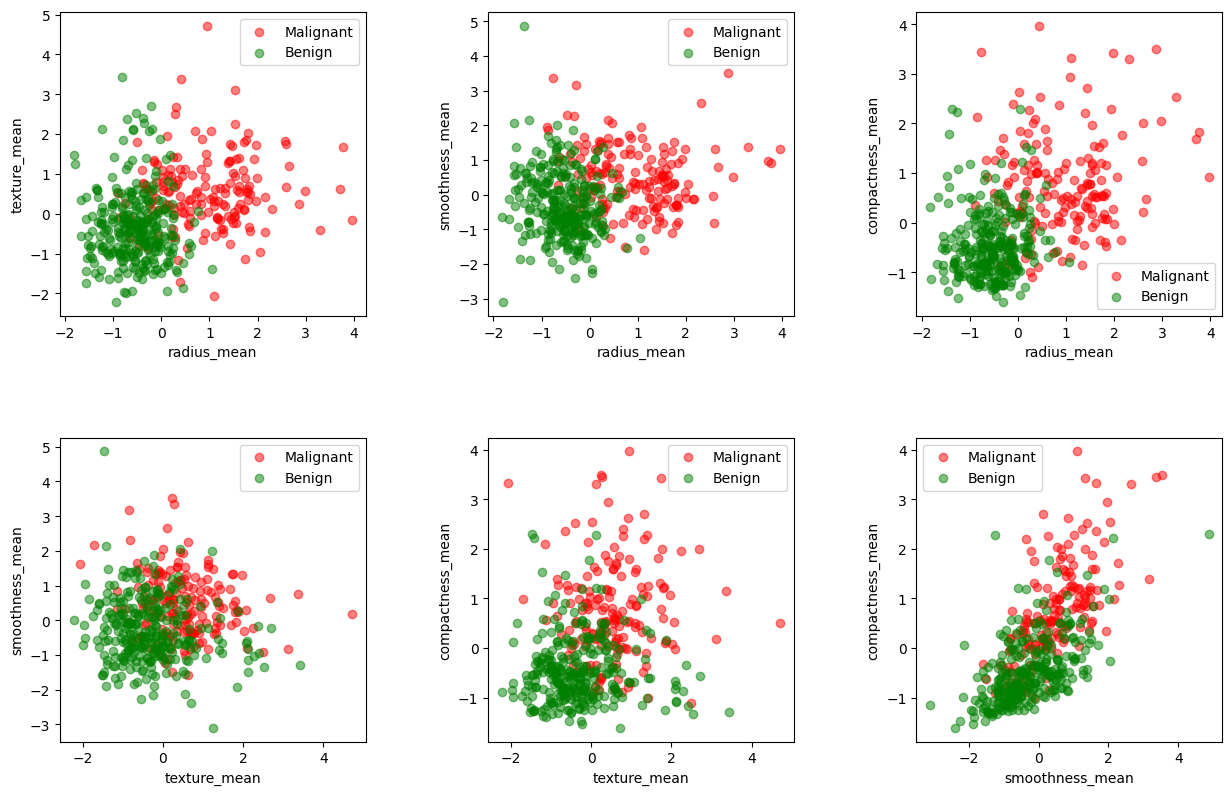

In [39]:
# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = utils.split_dataset(dataset, independent_vars,
                                                                   dependent_var, 0.2, random_state)
# Scale the dataset with a Standard Scaler
X_train, X_test = utils.scale_X_dataset(X_train, X_test, StandardScaler)
# Visualize the dataset, showing how the target variable is distributed per feature pair (also valid to analyze correlations)
utils.show_target_per_feature_pair(X_train, y_train, independent_vars, 'Malignant', 'Benign')

## Linear logistic regression

First, let's create and train a logistic regression model with the first two features.

In [40]:
model = LogisticRegression(random_state=random_state)
# Select the first two features for training and testing
X_train_two_features = X_train[independent_vars[:2]]
X_test_two_features = X_test[independent_vars[:2]]
# Train the model
model.fit(X_train_two_features, y_train)

LogisticRegression(random_state=42)

Now, let's predict the binary classification values of the test set with `predict`. Since the model allows knowing the probability of each class, we can use `predict_proba` to get the probabilities of each class and visualize the results.

Predicted labels: [0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]
Predicted probabilities: ['0.092', '0.981', '0.628', '0.073', '0.018', '0.999', '0.999', '0.810', '0.109', '0.191', '0.439', '0.824', '0.538', '0.850', '0.023', '0.994', '0.260', '0.016', '0.000', '0.995', '0.154', '0.057', '0.999', '0.020', '0.139', '0.049', '0.069', '0.090', '0.121', '0.957', '0.065', '0.020', '0.010', '0.155', '0.011', '0.043', '0.859', '0.020', '0.956', '0.676', '0.020', '0.818', '0.027', '0.059', '0.045', '0.062', '0.002', '0.046', '0.063', '0.074', '0.930', '0.989', '0.289', '0.106', '0.026', '0.148', '0.009', '1.000', '0.282', '0.011', '0.112', '0.990', '0.998', '0.762', '0.087', '0.263', '0.821', '0.996', '0.042', '0.157', '0.408', '0.616', '0.234', '0.823', '0.007', '0.086', '0.411', '0.214', '0.010', '0.011', '0.

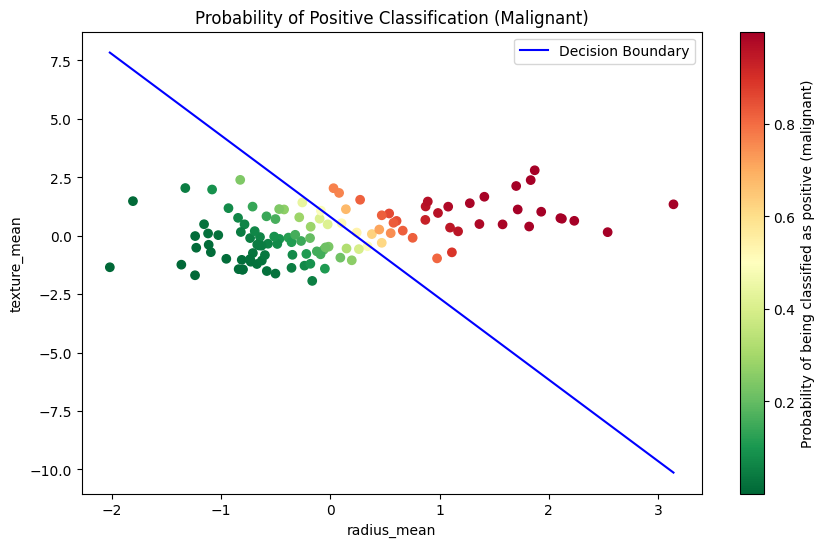

In [41]:
# Predict labels for the test set
y_pred = model.predict(X_test_two_features)
print(f"Predicted labels: {y_pred}")
# Predict probabilities for the test set (only for the positive class)
y_pred_proba = model.predict_proba(X_test_two_features)[:, 1]  # rows = individuals, columns = classes (we take the second column; the positive class)
# Show the probabilities with 3 decimals
print(f"Predicted probabilities: {[f'{prob:.3f}' for prob in y_pred_proba]}")
# Visualize the decision boundary and the probabilities assigned by the classifier
utils.plot_2d_logistic_regression_proba_classifier(X_test_two_features, y_pred_proba, independent_vars[0],
                                                   independent_vars[1], model,
                                                   'Probability of Positive Classification (Malignant)',
                                                   'Probability of being classified as positive (malignant)')

We show the two parameters of the model, which are the weights of the features. The parameter values can be interpreted as the importance of each feature in the classification. 

In [42]:
# Show the parameters of the model, indicating the weights and their respective feature names
print(f"Model parameters (weights) = {model.coef_}, for the following features = {X_test_two_features.columns.values}.")

Model parameters (weights) = [[3.10543669 0.89195905]], for the following features = ['radius_mean' 'texture_mean'].


We now evaluate the model with the test set.

In [43]:
accuracy = model.score(X_test_two_features, y_test)
print(f"Percentage of correctly classified samples with the first two features: {accuracy*100:.2f}%.")

Percentage of correctly classified samples with the first two features: 90.35%.


## ✨ Questions ✨

1. What is the most important feature for the model?
2. Why?
3. What happens when the value of the radius_mean increases?
4. Why?

### Answers:

*Write your answers here.*



## Linear logistic regression with all the features

Let's create another logistic regression model with all the features. We will train and evaluate the model.

In [44]:
# model creation
all_features_model = LogisticRegression(random_state=random_state)
# Train the model
all_features_model.fit(X_train, y_train)
# Evaluate the model
accuracy = all_features_model.score(X_test, y_test)
print(f"Percentage of correctly classified samples with all the features: {accuracy*100:.2f}%.")

Percentage of correctly classified samples with all the features: 93.86%.


## ✨ Questions ✨

5. Does this model improve the previous one?
6. Why?
7. Do you have any idea to improve the model?
8. How?
9. How do we select the model complexity?

### Answers

*Write your answers here.*



## Polynomial logistic regression

Let's add more features to the model and see if it improves the classifier's performance. 

First, we create a validation set from the training set. 

In [45]:
# Create a validation dataset from the existing training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

Now, we add polynomial features with increasing complexity, train the model with the training sset and evaluate it with the validation set.

In [46]:
best_accuracy, best_degree, best_model, best_poly_features = 0, 0, None, None
for degree in range(1, 10):
    # Create the polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    # Train a logistic regression model
    # (max_iter increases the number of iterations to converge)
    # (l1 and l2 regularization are applied by default)
    poly_model = LogisticRegression(random_state=random_state, max_iter=5000)
    poly_model.fit(X_train_poly, y_train)
    # Evaluate the model on the validation set
    accuracy = poly_model.score(X_val_poly, y_val)
    print(f"Percentage of correctly classified samples with polynomial degree of {degree} "
          f"on the val dataset: {accuracy * 100:.2f}%.")
    if accuracy > best_accuracy:
        best_accuracy, best_degree, best_model, best_poly_features = accuracy, degree, poly_model, poly_features

Percentage of correctly classified samples with polynomial degree of 1 on the val dataset: 91.21%.
Percentage of correctly classified samples with polynomial degree of 2 on the val dataset: 92.31%.
Percentage of correctly classified samples with polynomial degree of 3 on the val dataset: 93.41%.
Percentage of correctly classified samples with polynomial degree of 4 on the val dataset: 93.41%.
Percentage of correctly classified samples with polynomial degree of 5 on the val dataset: 93.41%.
Percentage of correctly classified samples with polynomial degree of 6 on the val dataset: 93.41%.
Percentage of correctly classified samples with polynomial degree of 7 on the val dataset: 93.41%.
Percentage of correctly classified samples with polynomial degree of 8 on the val dataset: 92.31%.
Percentage of correctly classified samples with polynomial degree of 9 on the val dataset: 92.31%.


Finally, we evaluate the best model with the test set.

In [47]:
# Let's evaluate the best model on the test set
X_test_poly = best_poly_features.transform(X_test)
accuracy = best_model.score(X_test_poly, y_test)
print(f"Percentage of correctly classified samples with polynomial degree of {best_degree} "
      f"on the test dataset: {accuracy * 100:.2f}%.")

Percentage of correctly classified samples with polynomial degree of 3 on the test dataset: 94.74%.


## ✨ Questions ✨

10. Did we improve the model's performance with the polynomial features?
11. Is a higher complexity always better?
12. Why do you think the model does not decrease that much for such high degrees?

### Answers

*Write your answers here.*

